# 컬러 영상 처리
-----
## openCV 컬러 표현 방법
openCV에서 색상을 표현하는 방법은 BGR, HSV, YCrCb등 여러가지가 있다.  

<br>

### BGR
가장 많이 사용하는 표현 방법. **파랑(B), 초록(G), 빨강(R)** 세 가지 색을 섞어서 색을 표현하는 방식이다. 각 색상은 0~255 사이 값으로 표시하고, 숫자가 클수록 더 밝아진다.  

### HSV
BGR과 같이 3개의 채널을 갖는다. 3개의 채널은 **색조(Hue), 채도(Saturation), 명도(Value)** 이다. H는 어떤 색상인지, S는 색상이 얼마나 순수한지, V는 색상의 밝기를 표현한다.

<img src="./img/hsv.JPG" width="20%" height="20%">

<br>

### YCrCb
**밝기(Luma), 밝기와 파란색과의 색상 차(Chroma Blue), 밝기와 빨간색의 색상 차(Chroma Red)** 총 3채널로 구성된다.
 
-----

## 컬러 표현 간 변환
openCV는 **cvtColor()** 함수를 제공한다.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('./img/flowers.jpg', cv2.IMREAD_COLOR) # BGR로 불러오기
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # BGR to HSV
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # BGR to HCrCb
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR to Gray Scale

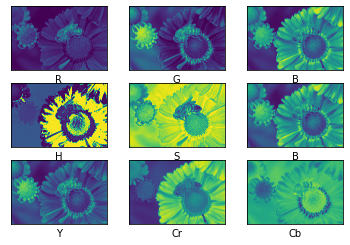

In [3]:
r = cv2.split(img) + cv2.split(hsv) + cv2.split(ycrcb)
label = ["R", "G", "B", "H", "S", "B", "Y", "Cr", "Cb"]
fig = plt.figure()
for i in range(len(r)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(r[i])
    ax.set_xlabel(label[i])
    ax.set_xticks([]), ax.set_yticks([])

## 컬러 히스토그램 평활화
그레이스케일 전체 구간에서 균일한 분포로 나타나도록 바꿔주는 기법이다.  
HSV, YCrCb는 밝기값 채널 V, Y를 히스토그램 평활화를 적용하면 된다.  
영상/사진의 명암비를 향상 시킬 수 있다.

### 구현 방법
히스토그램 평활화는 사진/영상 픽셀값들의 **누적분포함수** 를 이용한다.  
약 10-100 밝기에 몰려있는 밝기값을 균등하게 재분포 시키는 방법이다.  
계산 과정은 다음과 같다.

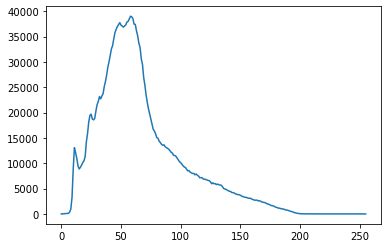

In [4]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256]) # 입력 그레이스케일 히스토그램 계산
plt.plot(hist)

#### 1. 누적 히스토그램 계산

In [5]:
# 누적 히스토그램 계산
sum = 0
cumulative_histogram = []
for i in hist:
    sum += i[0]
    cumulative_histogram.append(sum)
cumulative_histogram

[0.0,
 7.0,
 50.0,
 98.0,
 182.0,
 275.0,
 410.0,
 747.0,
 1744.0,
 5045.0,
 13929.0,
 27018.0,
 39091.0,
 50042.0,
 59525.0,
 68396.0,
 77602.0,
 87234.0,
 97368.0,
 107854.0,
 119183.0,
 133421.0,
 149304.0,
 167475.0,
 186939.0,
 206629.0,
 225359.0,
 243932.0,
 262785.0,
 283080.0,
 304639.0,
 326864.0,
 350041.0,
 372765.0,
 396049.0,
 419779.0,
 444922.0,
 471075.0,
 498517.0,
 527486.0,
 557521.0,
 588891.0,
 621485.0,
 654726.0,
 689356.0,
 725183.0,
 761647.0,
 798649.0,
 836025.0,
 873801.0,
 911068.0,
 948190.0,
 985070.0,
 1022159.0,
 1059482.0,
 1097370.0,
 1135386.0,
 1173886.0,
 1212917.0,
 1251852.0,
 1290396.0,
 1327871.0,
 1365287.0,
 1401422.0,
 1436595.0,
 1470287.0,
 1503161.0,
 1533794.0,
 1563370.0,
 1590366.0,
 1615829.0,
 1639423.0,
 1661501.0,
 1682304.0,
 1702091.0,
 1720795.0,
 1738457.0,
 1755171.0,
 1771545.0,
 1787353.0,
 1802428.0,
 1817381.0,
 1831739.0,
 1845820.0,
 1859548.0,
 1873087.0,
 1886730.0,
 1900018.0,
 1913106.0,
 1926057.0,
 1938826.0,
 195

#### 2. 1에서 구한 누적 히스토그램을 이용하여 정규화

In [6]:
# 그레이 스케일의 정규화된 누적 히스토그램 계산
normalize_cumulative_histogram = []
img_size = gray.size
for i in cumulative_histogram:
    normalize_cumulative_histogram.append(i / img_size)
normalize_cumulative_histogram

[0.0,
 2.848307291666667e-06,
 2.0345052083333332e-05,
 3.987630208333333e-05,
 7.405598958333334e-05,
 0.00011189778645833333,
 0.00016682942708333334,
 0.000303955078125,
 0.0007096354166666667,
 0.0020528157552083333,
 0.005667724609375,
 0.01099365234375,
 0.015906168619791668,
 0.020362141927083334,
 0.024220784505208332,
 0.027830403645833335,
 0.03157633463541667,
 0.03549560546875,
 0.039619140625,
 0.043885904947916665,
 0.04849568684895833,
 0.054289143880208335,
 0.060751953125,
 0.068145751953125,
 0.076065673828125,
 0.08407755533854167,
 0.09169881184895834,
 0.09925618489583334,
 0.106927490234375,
 0.115185546875,
 0.12395792643229167,
 0.13300130208333333,
 0.14243204752604166,
 0.151678466796875,
 0.16115275065104168,
 0.17080851236979167,
 0.18103922526041666,
 0.191680908203125,
 0.20284708658854167,
 0.21463460286458333,
 0.22685587565104168,
 0.239620361328125,
 0.25288289388020835,
 0.26640869140625,
 0.2804996744791667,
 0.29507771809895833,
 0.30991495768229166

#### 3. 2에서 정규화 시킨 히스토그램을 평활화에 적용

In [7]:
# 히스토그램 평활화 적용
gray_layer, = cv2.split(gray)
img_new = [[0 for _ in range(gray_layer.shape[1])] for _ in range(gray_layer.shape[0])]
for y in range(gray_layer.shape[0]):
    for x in range(gray_layer.shape[1]):
        img_new[y][x] = round(normalize_cumulative_histogram[gray_layer[y][x]] * 255)

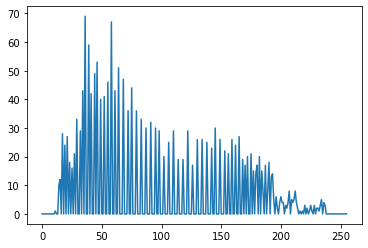

In [8]:
new_img = cv2.merge([np.asarray(img_new)])
new_img = new_img.astype('uint8')
hist2 = cv2.calcHist(new_img, [0], None, [256], [0, 256]) # 결과 그레이스케일 히스토그램 계산
plt.plot(hist2)

openCV는 **equalizeHist()** 라는 함수를 이용하여 히스토그램 평활화를 할 수 있다.

In [9]:
use_api = cv2.equalizeHist(gray)

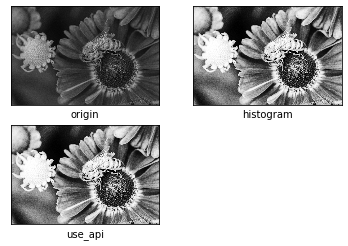

In [10]:
r = [gray, new_img, use_api]
label = ["origin", "histogram", "use_api"]
fig = plt.figure()
for i in range(len(r)):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(r[i], cmap='gray', interpolation='none', vmin=0, vmax=255)
    ax.set_xlabel(label[i])
    ax.set_xticks([]), ax.set_yticks([])

## 색상 범위 지정에 의한 영역 분할
색 정보가 따로 있는 HSV를 주로 이용한다. 특정 색 영역만 찾을때 사용한다.  
**inRange()** 함수를 통해 특정 색상을 추출할 수 있다.

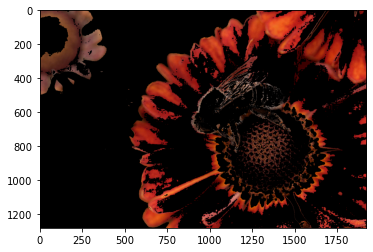

In [14]:
img_mask = cv2.inRange(hsv, (0, 0, 0), (12, 255, 255)) # h 0-12, s 0-255, v 0-255
img_result = cv2.bitwise_and(img, img, mask=img_mask) # 원본 이미지에 마스크로 적용
img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
plt.imshow(img_result)

## 히스토그램 역투영
영상의 각 픽셀이 주어진 히스초그램 모델에 얼마나 일치하는지를 검사하는 방법이다.  
임의의 색상 영역을 검출할 때 효과적이다.

### 검출 과정

#### 1. 검출할 영역 히스토그램 만들기
검출할 영역 일부를 미리 크롭한 사진을 이용해 검출에 사용할 히스토그램을 만든다.

In [15]:
img_his = cv2.imread("./img/flower_histogram.jpg")
img_his_ycbr = cv2.cvtColor(img_his, cv2.COLOR_BGR2YCrCb)
hist = cv2.calcHist([img_his_ycbr], [1, 2], None, [128, 128], [0, 256, 0, 256])
hist_norm = cv2.normalize(cv2.log(hist + 1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) # 큰 값에 몰리지 않도록 하기 위해 log스케일을 해줌

#### 2. 입력 영상 전체에 히스토그램 역투영
openCV에서 지원하는 **calcBackProject()** 함수를 이용해서 히스토그램을 역투영 한다.

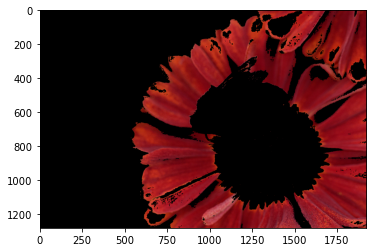

In [16]:
backproj = cv2.calcBackProject([ycrcb], [1, 2], hist, [0, 256, 0, 256], 1)
img_result = cv2.copyTo(img, backproj)
img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
plt.imshow(img_result)